<small><i>September 2014 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and license info are in the folder.</i></small>

In [1]:
#from IPython.core.display import HTML
#def css_styling():
#    styles = open("styles/custom.css", "r").read()
#    return HTML(styles)
#css_styling()

In [2]:
%matplotlib inline

#Advanced filtering

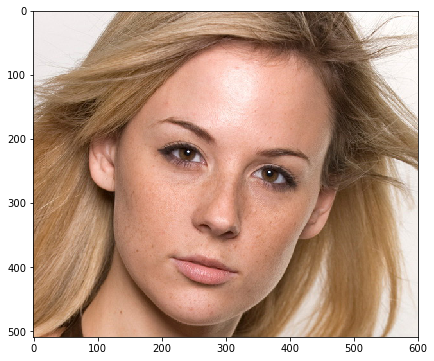

In [3]:
%matplotlib inline
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

image = io.imread('./pim4files/freckles.jpg')/255.
plt.imshow(image)
plt.gcf().set_size_inches((10,6))

#Designing non linear filters

Linear filtering can be solved using correlation and convolution. But what if we want to apply non-linear operators?

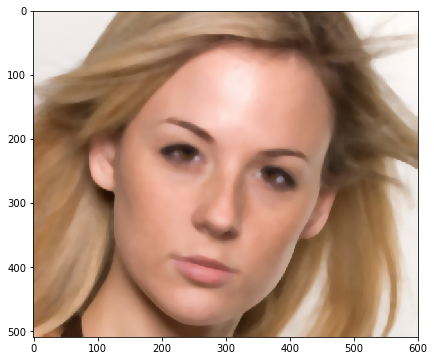

In [4]:
def my_filter(x):
    return np.median(x)

from scipy import ndimage
def rgb_generic_filter(image, func, size):
    r=ndimage.generic_filter(image[:,:,0],func,size)
    g=ndimage.generic_filter(image[:,:,1],func,size)
    b=ndimage.generic_filter(image[:,:,2],func,size)
    return np.dstack((r,g,b))

res = rgb_generic_filter(image,my_filter,[11,11])
plt.imshow(res)
plt.gcf().set_size_inches((10,6))

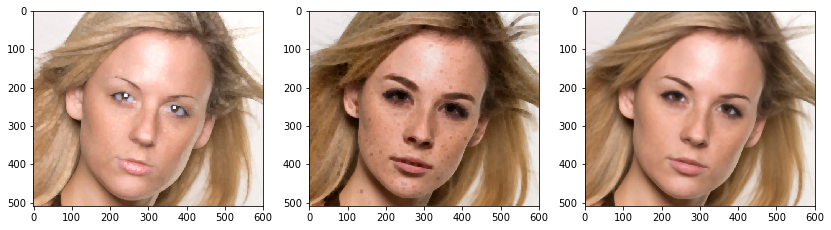

In [5]:
def max_filter(x):
    return np.max(x)

def min_filter(x):
    return np.min(x)

def median_filter(x):
    return np.median(x)

sz = [7,7]
res_max = rgb_generic_filter(image,max_filter,sz)
res_min = rgb_generic_filter(image,min_filter,sz)
res_med = rgb_generic_filter(image,median_filter,sz)
plt.subplot(1,3,1)
plt.imshow(res_max)
plt.subplot(1,3,2)
plt.imshow(res_min)
plt.subplot(1,3,3)
plt.imshow(res_med)
plt.gcf().set_size_inches((14,6))

In [7]:
#OLD PYTHON 2.7 code
#sz = 21
#half_sz=int(np.floor(sz/2.)+1)
#xx,yy = np.meshgrid(np.linspace(-4,4,sz),np.linspace(-4,4,sz))
#mask = np.exp(-0.5*(xx*xx+yy*yy))
#mask_r = mask.ravel()
#beta=180.
#
#def bilateral_filter(x):
#    pc = int(x[np.floor(len(x)/2.)+1])
#    mask_i=np.exp(-0.5*(x-pc)*(x-pc)*beta)
#    mask=mask_r*mask_i.ravel()
#    mask=mask/np.sum(mask)
#    return np.sum(mask*x)
#
#def bilateral_filter2(x):
#    pc = int(x[np.floor(len(x)/2.)+1])
#    mask_i=np.where(np.abs(x-pc)<0.2,1.,0.)
#    mask=mask_r*mask_i.ravel()
#    mask=mask/np.sum(mask)
#    return np.sum(mask*x)
#
#
#res_max = rgb_generic_filter(image,bilateral_filter2,[sz,sz])

In [ ]:

from skimage import io
import numpy as np
import matplotlib.pyplot as plt


image = io.imread('./pim4files/freckles.jpg')/255.
#plt.imshow(image)
plt.gcf().set_size_inches((10,6))
sz = 21
half_sz=int(np.floor(sz/2.)+1)
xx,yy = np.meshgrid(np.linspace(-4,4,sz),np.linspace(-4,4,sz))
mask = np.exp(-0.5*(xx*xx+yy*yy))
mask_r = mask.ravel()
beta=180.

def my_filter(x):
    return np.median(x)

from scipy import ndimage
def rgb_generic_filter(image, func, size):
    r=ndimage.generic_filter(image[:,:,0],func,size)
    g=ndimage.generic_filter(image[:,:,1],func,size)
    b=ndimage.generic_filter(image[:,:,2],func,size)
    return np.dstack((r,g,b))

def bilateral_filter(x):
    pc = int(x[np.floor(len(x)/2.)+1])
    mask_i=np.exp(-0.5*(x-pc)*(x-pc)*beta)
    mask=mask_r*mask_i.ravel()
    mask=mask/np.sum(mask)
    return np.sum(mask*x)

def bilateral_filter2(x):
    print (x.shape)
    #pc = int(x[int(np.floor(len(x)/2))+1])
    #pc = int(x[np.floor(len(x)/2.)+1])
    #mask_i=np.where(np.abs(x-pc)<0.2,1.,0.)
    #mask=mask_r*mask_i.ravel()
    #mask=mask/np.sum(mask)
    #return np.sum(mask*x)
    return 1


import math
def distance(x, y, i, j):
    return np.sqrt((x-i)**2 + (y-j)**2)


def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (x ** 2) / (2 * sigma ** 2))


def apply_bilateral_filter(source, filtered_image, x, y, diameter, sigma_i, sigma_s):
    hl = diameter/2
    i_filtered = 0
    Wp = 0
    i = 0
    while i < diameter:
        j = 0
        while j < diameter:
            neighbour_x = x - (hl - i)
            neighbour_y = y - (hl - j)
            if neighbour_x >= len(source):
                neighbour_x -= len(source)
            if neighbour_y >= len(source[0]):
                neighbour_y -= len(source[0])
            n_x=int(np.floor(neighbour_x))
            n_y=int(np.floor(neighbour_y))
            gi = gaussian(source[n_x][n_y] - source[x][y], sigma_i)
            gs = gaussian(distance(n_x, n_y, x, y), sigma_s)
            w = gi * gs
            i_filtered += source[n_x][n_y] * w
            Wp += w
            j += 1
        i += 1
    i_filtered = i_filtered / Wp
    filtered_image[x][y] = int(round(i_filtered))


def bilateral_filter_own(source, filter_diameter, sigma_i, sigma_s):
    filtered_image = np.zeros(source.shape)

    i = 0
    while i < len(source):
        j = 0
        while j < len(source[0]):
            apply_bilateral_filter(source, filtered_image, i, j, filter_diameter, sigma_i, sigma_s)
            j += 1
        i += 1
        print(i, end=' ')
    return filtered_image

image2=image[::3,::3,:]
res_max = np.zeros(image2.shape, 'uint8')
res_max[..., 0] = bilateral_filter_own(image2[:,:,0]*256, sz, 12.0, 16.0)
res_max[..., 1]= bilateral_filter_own(image2[:,:,1]*256, sz, 12.0, 16.0)
res_max[..., 2] = bilateral_filter_own(image2[:,:,2]*256, sz, 12.0, 16.0)

plt.imshow(res_max,cmap='jet')
#res_max = rgb_generic_filter(image,bilateral_filter2,[sz,sz])


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 

In [ ]:
plt.subplot(1,2,1)
plt.imshow(image2)
plt.subplot(1,2,2)
plt.imshow(res_max)
plt.gcf().set_size_inches((16,8))

In [ ]:
print (np.max(res_max))